In [9]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from helpers import cusplot as cplt

## helpers

In [10]:
def calc_magn(ang,*l):
    '''function that calculates (integrated) magnetic field'''    
    if not l:
        B = ang*1.23 # integrated B-field [Tm]
    else:
        B = ang*1.23/l
    
    return round(B,3)

## kick angle evalution

In [4]:
# geometric considerations

x_sep = 0.06
x_add = 0.24

steps = 100
Thet_k = np.arange(1,100,(100-1)/steps)*1e-3
Thet_p = np.arange(1,1000,(1000-1)/steps)*1e-3

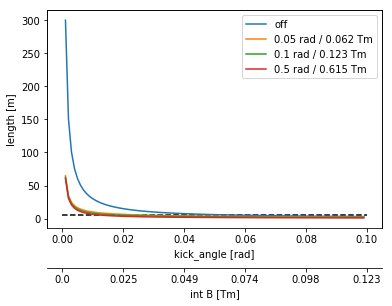

In [11]:
# sliced plot
ax1 = plt.gca()
Thet_p_list = np.multiply([0,50,100,500],1e-3)
for Thet_p_fix in Thet_p_list:
    ax1.plot(Thet_k, x_sep/np.sin(Thet_k) + x_add/np.sin(Thet_k+Thet_p_fix))
    
    
ax1.set_ylabel('length [m]')
ax1.set_xlabel('kick_angle [rad]')
# B field calculated for 70 Mev protons, 0.5 m kicker length
ax1.legend(['{} rad / {} Tm'.format(x,calc_magn(x)) if x !=0 else 'off' for x in Thet_p_list])
ax1.hlines(5,0,0.1, linestyles='--')


# add B-field information
cplt.add_axis(ax1,'x',calc_magn,'int B [Tm]')


plt.savefig('/home/marius/Jülich/Multiplexer/Plots/kick_angle_eval_geom_2')
plt.show()

In [6]:
# iterative solution (kick ~ perm)
d = {}

for Thet_p_iter in np.linspace(0,1,101):
            Thet_k_iter = 0.001
            f = x_sep/np.sin(Thet_k_iter) + x_add/np.sin(Thet_k_iter + Thet_p_iter)
            while f >= 5:
                Thet_k_iter = Thet_k_iter + 0.001
                f = x_sep/np.sin(Thet_k_iter) + x_add/np.sin(Thet_k_iter + Thet_p_iter)
            
            d[Thet_p_iter] = round(Thet_k_iter,3)

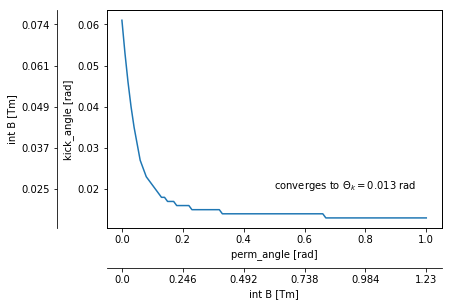

In [12]:
ax = plt.gca()

ax.plot(*zip(*sorted(d.items())))
ax.set_ylabel('kick_angle [rad]')
ax.set_xlabel('perm_angle [rad]')

last_ele = list(d.values())[-1]
ax.text(0.5,0.02, r'converges to $\Theta_k = {}$ rad'.format(last_ele))

# add B-field information
cplt.add_axis(ax,'x',calc_magn,'int B [Tm]')
cplt.add_axis(ax,'y',calc_magn,'int B [Tm]')

plt.savefig('/home/marius/Jülich/Multiplexer/Plots/kick_angle_eval_geom_2_comp')
plt.show()

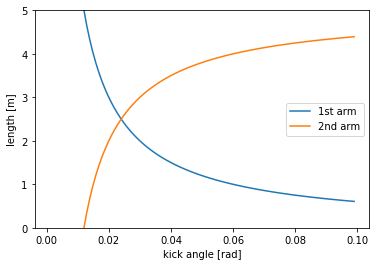

In [13]:
ax = plt.gca()

ax.plot(Thet_k, x_sep/np.sin(Thet_k))
ax.plot(Thet_k, 5-x_sep/np.sin(Thet_k))
ax.set_xlabel('kick angle [rad]')
ax.set_ylabel('length [m]')
ax.set_ylim(0,5)
ax.legend(['1st arm', '2nd arm'])

plt.savefig('/home/marius/Jülich/Multiplexer/Plots/kick_angle_eval_geom_2_arms')
plt.show()